In [ ]:
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("/content/data1.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [ ]:
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("/content/data_gray.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import glob
from PIL import Image

In [ ]:
filelist = glob.glob('/content/data1/*.jpg')
data_c = np.array([np.array(Image.open(fname)) for fname in filelist])

In [ ]:
filelist = glob.glob('/content/data_gray/*.jpg')
data_g = np.array([np.array(Image.open(fname)) for fname in filelist])

In [ ]:
print(data_c[0].shape)

(224, 224, 3)


In [ ]:
import matplotlib.pyplot as plt

n = 10 # how many records we will display
plt.figure(figsize=(50, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data_c[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

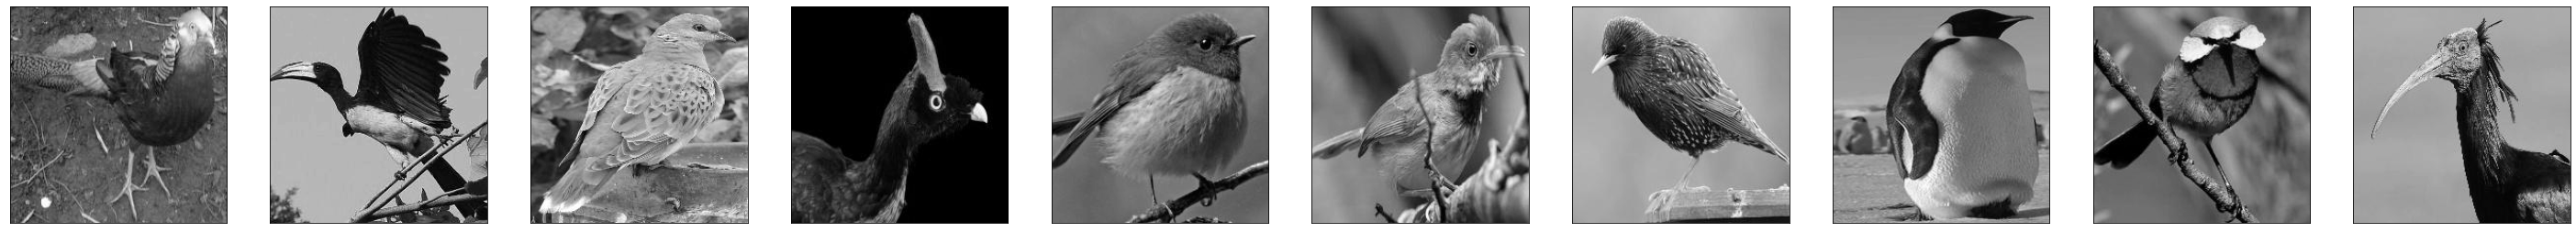

In [ ]:
import matplotlib.pyplot as plt

n = 10 # how many records we will display
plt.figure(figsize=(50, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data_g[i].reshape(224,224))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_g, data_c, test_size=0.33, random_state=42)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
Y_train = Y_train.astype('float32')/255
Y_test = Y_test.astype('float32')/255
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1500, 224, 224)
(739, 224, 224)
(1500, 224, 224, 3)
(739, 224, 224, 3)


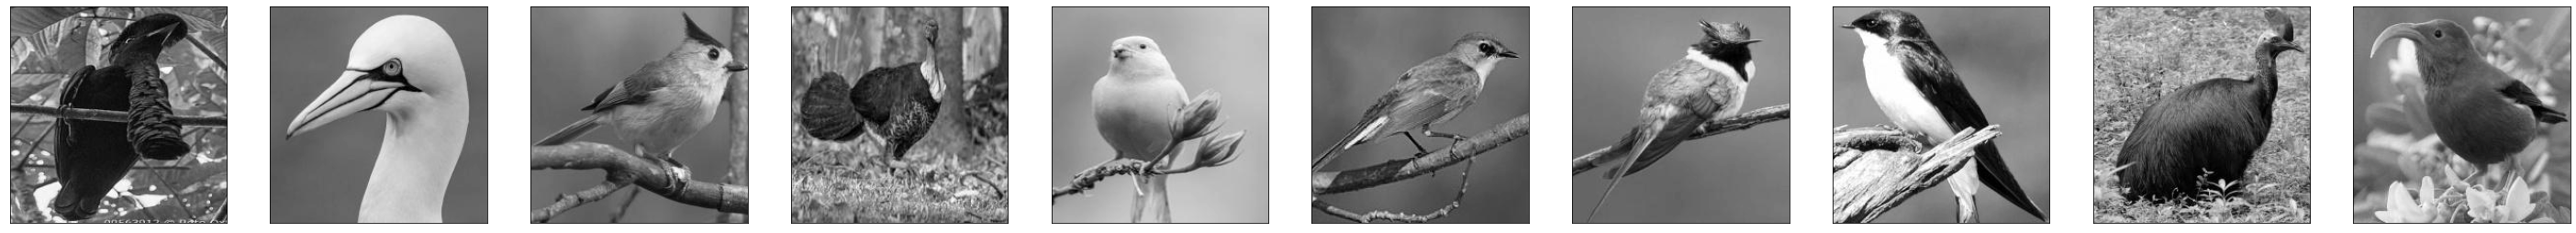

In [ ]:
import matplotlib.pyplot as plt

n = 10 # how many records we will display
plt.figure(figsize=(50, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i].reshape(224,224))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

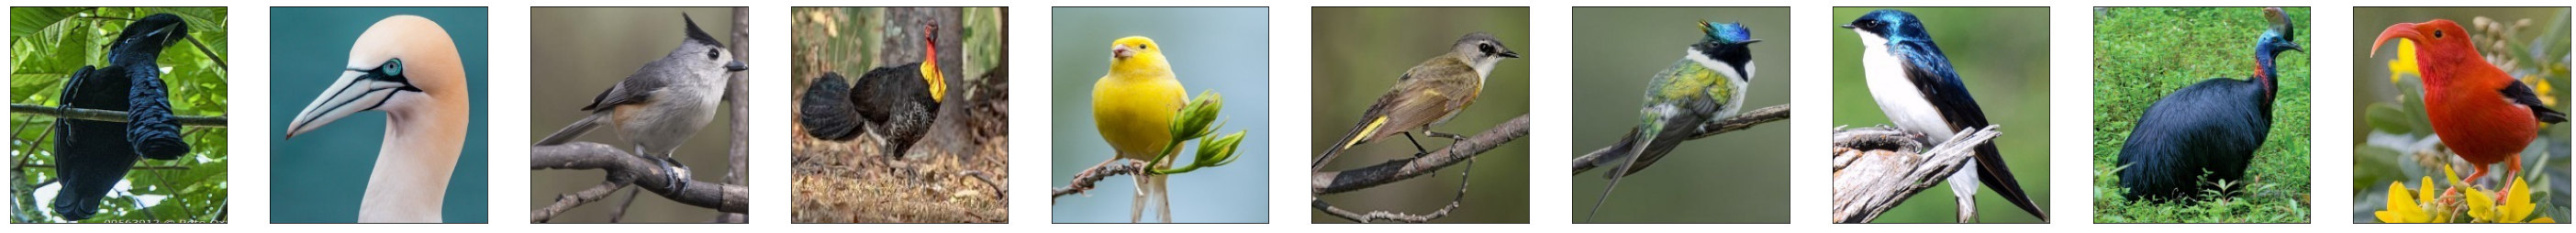

In [ ]:
import matplotlib.pyplot as plt

n = 10 # how many records we will display
plt.figure(figsize=(50, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(Y_train[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Conv2DTranspose, Flatten, Reshape
from keras.models import Model

input_img = Input(shape=(224, 224,1))  

x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(3, (3, 3), activation='relu', padding='same')(x)
encoded = x


In [ ]:

x = Conv2DTranspose(128, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
x = Conv2DTranspose(128, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
x = Conv2DTranspose(64, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
x = Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

In [ ]:
# Train the model
autoencoder.fit(X_train, Y_train,
                epochs=500,
                batch_size=128,
                shuffle=True
               )

Epoch 1/500
12/12 [==============================] - 29s 1s/step - loss: 0.0604
Epoch 2/500
12/12 [==============================] - 9s 764ms/step - loss: 0.0579
Epoch 3/500
12/12 [==============================] - 9s 768ms/step - loss: 0.0555
Epoch 4/500
12/12 [==============================] - 9s 761ms/step - loss: 0.0462
Epoch 5/500
12/12 [==============================] - 9s 760ms/step - loss: 0.0384
Epoch 6/500
12/12 [==============================] - 9s 755ms/step - loss: 0.0345
Epoch 7/500
12/12 [==============================] - 9s 754ms/step - loss: 0.0314
Epoch 8/500
12/12 [==============================] - 9s 753ms/step - loss: 0.0300
Epoch 9/500
12/12 [==============================] - 9s 759ms/step - loss: 0.0270
Epoch 10/500
12/12 [==============================] - 9s 763ms/step - loss: 0.0249
Epoch 11/500
12/12 [==============================] - 9s 761ms/step - loss: 0.0232
Epoch 12/500
12/12 [==============================] - 9s 762ms/step - loss: 0.0220
Epoch 13/500
12

In [ ]:
autoencoder.evaluate(X_test,Y_test)

24/24 [==============================] - 3s 90ms/step - loss: 0.0164


0.01635790802538395

In [ ]:
predictions=autoencoder.predict(X_test)

24/24 [==============================] - 2s 71ms/step


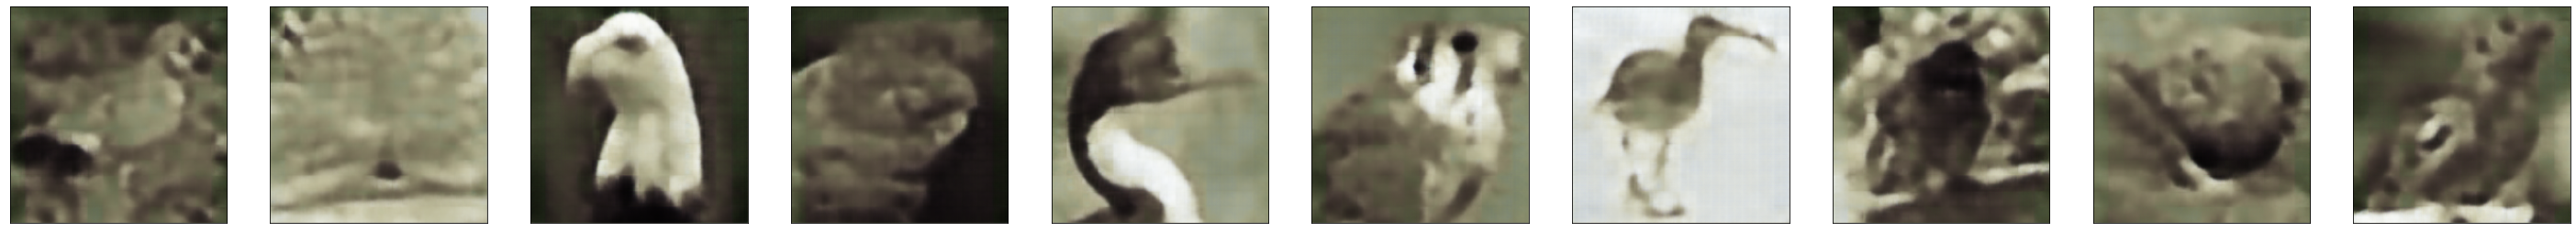

In [ ]:
import matplotlib.pyplot as plt

n = 10 # how many records we will display
plt.figure(figsize=(50, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(predictions[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

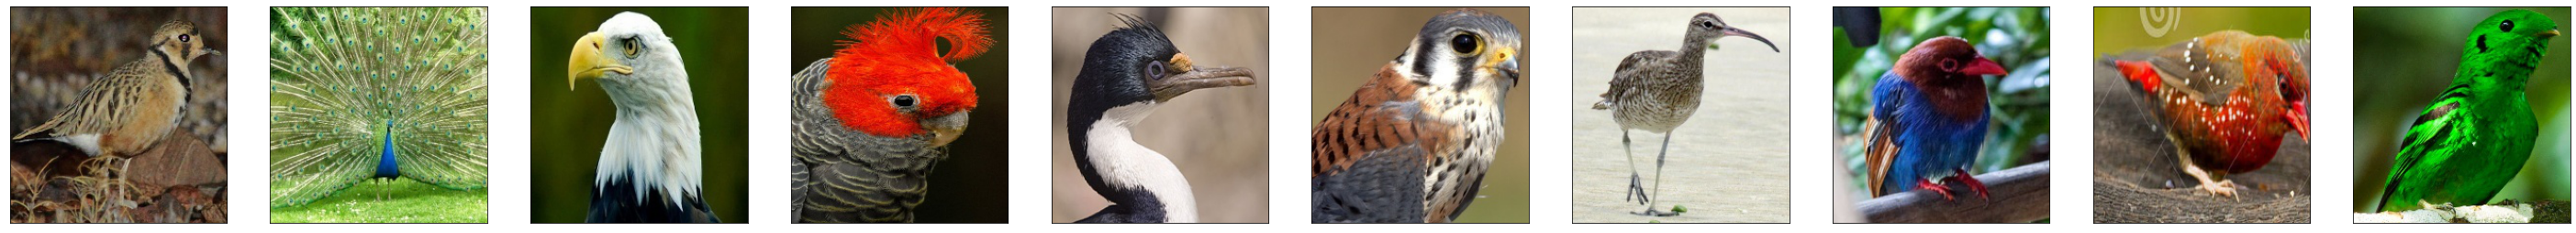

In [ ]:
import matplotlib.pyplot as plt

n = 10 # how many records we will display
plt.figure(figsize=(50, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(Y_test[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
autoencoder.save("/content/Untitled Folder")